# 3rd Block. Reloading... Animation

## Scrap data from  [here](https://www.athlinks.com/event/250405/results/Event/757258/Course/1285295/Results) and save to .csv file

In [9]:
import json
from pprint import pprint

import requests
from tqdm import tqdm_notebook
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))

%matplotlib inline

In [36]:
EVENT = 757258
COURSE = 1285295
URL = "https://alaska.athlinks.com/Events/Race/Result/Api/Event/{EVENT}/Course/{COURSE}/Bib/{ATHLET_NUM}" # .format(EVENT=EVENT, COURSE=COURSE)
print(URL)

https://alaska.athlinks.com/Events/Race/Result/Api/Event/{EVENT}/Course/{COURSE}/Bib/{ATHLET_NUM}


In [37]:
r = requests.get(URL.format(EVENT=EVENT, COURSE=COURSE, ATHLET_NUM=71))

In [65]:
data = r.json()

In [70]:
data['result']

{'courses': [{'affiliateCourseId': '107790',
   'affiliateEventId': '42969',
   'courseId': 1290570,
   'courseName': 'Sprint',
   'coursePattern': '3:750.00;0:0.00;4:20000.00;0:0.00;1:5000.00',
   'coursePatternCategory': '3:750.00;0:0.00;4:20000.00;0:0.00;1:5000.00',
   'coursePatternDescription': '750M Swim, 0 Transition, 12.4Mi Bike/Cycle, 0 Transition, 3.1Mi Run',
   'distUnit': 25750.0,
   'divisionId': None,
   'divisionName': 'Overall',
   'eventCourseId': 1285295,
   'isCtLive': True,
   'isPublished': False,
   'legCount': 0,
   'legs': [],
   'raceCategory': 'TriathlonMultisport',
   'results': [{'affiliateCourseId': '107790',
     'affiliateEventId': '42969',
     'age': 0,
     'ageRank': 13,
     'beginChipTime': 0,
     'bib': '71',
     'brackets': [{'bracketName': 'Overall',
       'bracketPublishResults': 1,
       'bracketRankType': 'GUN',
       'bracketTag': 'ALL',
       'bracketType': 'OPEN',
       'id': 1170065,
       'pace': None,
       'paceUnit': '--',
   

In [57]:
for leg in r.json()['result']['courses'][0]['results'][0]['legs']:
    pprint(leg)

{'legId': 0,
 'legName': None,
 'legNumber': 1,
 'paceString': 'null',
 'paceUnit': None,
 'rankA': 13,
 'rankATotal': None,
 'rankG': 66,
 'rankGTotal': None,
 'rankO': 75,
 'rankOTotal': None,
 'speed': None,
 'ticks': None,
 'ticksString': '00:27:47'}
{'legId': 0,
 'legName': None,
 'legNumber': 2,
 'paceString': '00:03:21 min/100m',
 'paceUnit': None,
 'rankA': 13,
 'rankATotal': None,
 'rankG': 67,
 'rankGTotal': None,
 'rankO': 76,
 'rankOTotal': None,
 'speed': None,
 'ticks': None,
 'ticksString': '00:25:05'}
{'legId': 0,
 'legName': None,
 'legNumber': 3,
 'paceString': 'null',
 'paceUnit': None,
 'rankA': 13,
 'rankATotal': None,
 'rankG': 63,
 'rankGTotal': None,
 'rankO': 72,
 'rankOTotal': None,
 'speed': None,
 'ticks': None,
 'ticksString': '01:19:19'}
{'legId': 0,
 'legName': None,
 'legNumber': 4,
 'paceString': '15.51 km/hr',
 'paceUnit': None,
 'rankA': 13,
 'rankATotal': None,
 'rankG': 63,
 'rankGTotal': None,
 'rankO': 72,
 'rankOTotal': None,
 'speed': None,
 'ti

In [59]:
df = pd.DataFrame(r.json()['result']['courses'][0]['results'][0]['legs'])

In [63]:
df.sort_values(by='ticksString')

,legId,legName,legNumber,paceString,paceUnit,rankA,rankATotal,rankG,rankGTotal,rankO,rankOTotal,speed,ticks,ticksString
1,0,None,2,00:03:21 min/100m,None,13,None,67,None,76,None,None,None,00:25:05
0,0,None,1,null,None,13,None,66,None,75,None,None,None,00:27:47
3,0,None,4,15.51 km/hr,None,13,None,63,None,72,None,None,None,01:17:22
2,0,None,3,null,None,13,None,63,None,72,None,None,None,01:19:19
4,0,None,5,00:21:40 min/km,None,13,None,62,None,67,None,None,None,01:48:20
5,0,None,6,null,None,13,None,62,None,67,None,None,None,01:48:20


In [100]:
data = []
for athlet_num in tqdm_notebook(range(1, 137)):
    d = {}
    r = requests.get(URL.format(EVENT=EVENT, COURSE=COURSE, ATHLET_NUM=athlet_num))
    try:
        d['bib'] = r.json()['result']['courses'][0]['results'][0]['bib']
        d['name'] = r.json()['result']['courses'][0]['results'][0]['firstName']
        d['surname'] = r.json()['result']['courses'][0]['results'][0]['lastName']
        d['total_time'] = pd.Timedelta(r.json()['result']['courses'][0]['results'][0]['ivTimeWithPenalty'])
        d['t_swim'], d['t_tranzit_1'], d['t_bike'], d['t_tranzit_2'], d['t_run'], *_ = sorted([pd.Timedelta(leg['ticksString']) for leg in r.json()['result']['courses'][0]['results'][0]['legs']])
    except Exception as error:
        print('Error #%s, %s' % (athlet_num, error))
    else:
        data.append(d)

HBox(children=(IntProgress(value=0, max=136), HTML(value='')))

/home/sasha253c/.local/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


Error #18, list index out of range
Error #20, list index out of range
Error #27, list index out of range
Error #35, list index out of range
Error #37, list index out of range
Error #41, list index out of range
Error #42, list index out of range
Error #45, list index out of range
Error #47, not enough values to unpack (expected at least 5, got 2)
Error #57, list index out of range
Error #63, list index out of range
Error #66, list index out of range
Error #67, list index out of range
Error #68, list index out of range
Error #72, list index out of range
Error #73, list index out of range
Error #78, list index out of range
Error #79, list index out of range
Error #85, list index out of range
Error #86, list index out of range
Error #92, list index out of range
Error #93, list index out of range
Error #96, list index out of range
Error #99, list index out of range
Error #100, list index out of range
Error #101, list index out of range
Error #102, list index out of range
Error #103, list in

In [152]:
df = pd.DataFrame(data)

In [153]:
df.head()

,bib,name,surname,t_bike,t_run,t_swim,t_tranzit_1,t_tranzit_2,total_time
0,1,Олександр,Кудрик,00:52:22,01:17:42,00:16:20,00:17:44,00:53:38,01:17:42
1,2,Денис,Шиков,01:03:16,01:39:40,00:18:58,00:21:21,01:04:30,01:39:40
2,3,Сергій,Муравинець,00:53:05,01:19:14,00:13:05,00:14:57,00:54:24,01:19:14
3,4,Максим,П'ятенко,01:03:03,01:34:11,00:15:12,00:18:05,01:04:05,01:34:11
4,5,Сергій,Поліщук,01:05:38,01:36:31,00:22:13,00:24:16,01:07:51,01:36:31


In [155]:
df.columns

Index(['bib', 'name', 'surname', 't_bike', 't_run', 't_swim', 't_tranzit_1',
       't_tranzit_2', 'total_time'],
      dtype='object')

In [189]:
# time in zone
leg_columns = ('t_run', 't_tranzit_2', 't_bike', 't_tranzit_1', 't_swim')
for i, j in zip(leg_columns, leg_columns[1:]):    
    df[i] -= df[j]

In [178]:
df.head()

,bib,name,surname,t_bike,t_run,t_swim,t_tranzit_1,t_tranzit_2,total_time
0,1,Олександр,Кудрик,00:34:38,00:24:04,00:16:20,00:01:24,00:01:16,01:17:42
1,2,Денис,Шиков,00:41:55,00:35:10,00:18:58,00:02:23,00:01:14,01:39:40
2,3,Сергій,Муравинець,00:38:08,00:24:50,00:13:05,00:01:52,00:01:19,01:19:14
3,4,Максим,П'ятенко,00:44:58,00:30:06,00:15:12,00:02:53,00:01:02,01:34:11
4,5,Сергій,Поліщук,00:41:22,00:28:40,00:22:13,00:02:03,00:02:13,01:36:31


In [172]:
# df['total_time'] = df['total_time'].apply(lambda x: pd.Timedelta(x))

In [177]:
assert all(df['t_bike'] + df['t_run'] + df['t_swim'] + df['t_tranzit_1'] + df['t_tranzit_2'] == df['total_time'])

In [179]:
df.to_csv('data.csv')

## Data Analis

In [10]:
sns.set(rc={'figure.figsize':(8, 6)})
leg_columns = ('t_run', 't_tranzit_2', 't_bike', 't_tranzit_1', 't_swim')

In [11]:
df = pd.read_csv('data.csv')
df.drop(columns='Unnamed: 0', inplace=True)
for time_column in ('t_bike', 't_run', 't_swim', 't_tranzit_1', 't_tranzit_2', 'total_time'):
    df[time_column] = pd.to_timedelta(df[time_column])

In [12]:
df.head()

,bib,name,surname,t_bike,t_run,t_swim,t_tranzit_1,t_tranzit_2,total_time
0,1,Олександр,Кудрик,00:34:38,00:24:04,00:16:20,00:01:24,00:01:16,01:17:42
1,2,Денис,Шиков,00:41:55,00:35:10,00:18:58,00:02:23,00:01:14,01:39:40
2,3,Сергій,Муравинець,00:38:08,00:24:50,00:13:05,00:01:52,00:01:19,01:19:14
3,4,Максим,П'ятенко,00:44:58,00:30:06,00:15:12,00:02:53,00:01:02,01:34:11
4,5,Сергій,Поліщук,00:41:22,00:28:40,00:22:13,00:02:03,00:02:13,01:36:31


In [13]:
# convert timedelta to seconds
for i, j in zip([c+'_sec' for c in leg_columns], leg_columns):
    df[i] = df[j].map(lambda x: x.seconds)

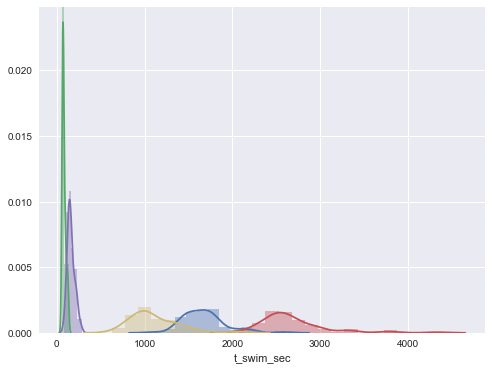

In [14]:
for leg in [c+'_sec' for c in leg_columns]:
    sns.distplot(df[leg])
    
#     sns.swarmplot(data=df, x=leg, linewidth=1)

In [15]:
df.head()

,bib,name,surname,t_bike,t_run,t_swim,t_tranzit_1,t_tranzit_2,total_time,t_run_sec,t_tranzit_2_sec,t_bike_sec,t_tranzit_1_sec,t_swim_sec
0,1,Олександр,Кудрик,00:34:38,00:24:04,00:16:20,00:01:24,00:01:16,01:17:42,1444,76,2078,84,980
1,2,Денис,Шиков,00:41:55,00:35:10,00:18:58,00:02:23,00:01:14,01:39:40,2110,74,2515,143,1138
2,3,Сергій,Муравинець,00:38:08,00:24:50,00:13:05,00:01:52,00:01:19,01:19:14,1490,79,2288,112,785
3,4,Максим,П'ятенко,00:44:58,00:30:06,00:15:12,00:02:53,00:01:02,01:34:11,1806,62,2698,173,912
4,5,Сергій,Поліщук,00:41:22,00:28:40,00:22:13,00:02:03,00:02:13,01:36:31,1720,133,2482,123,1333


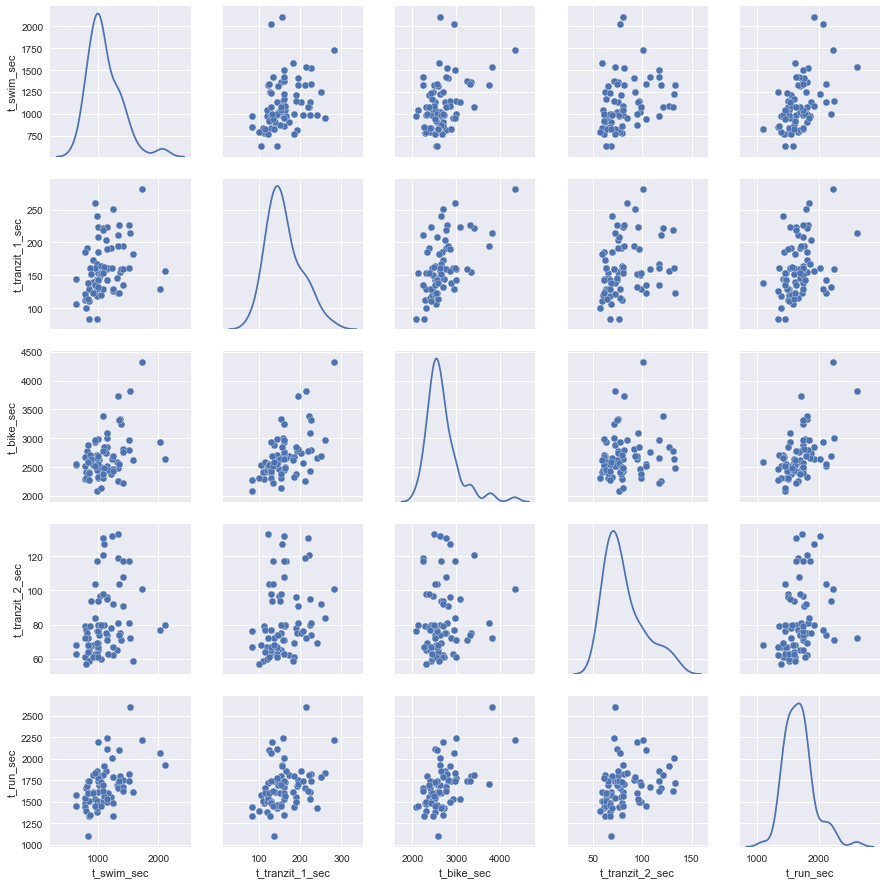

In [16]:
sns.pairplot(df[[c+'_sec' for c in leg_columns][::-1]],  diag_kind="kde")

## Map animation

In [17]:
import folium
import folium.plugins as plugins
import numpy as np
import trace_script

In [27]:
from folium.plugins import TimestampedGeoJson

In [62]:
NUM = 20

In [18]:
folium.__version__

'0.6.0'

In [19]:
folium_map = folium.Map(location=trace_script.BASE_POINT,
                        zoom_start=14,
                        tiles="openstreetmap")

folium_map

In [20]:
import json

In [21]:
trace_script.BASE_POINT

(51.492309, 25.76056)

In [113]:
folium_map = folium.Map(location=trace_script.BASE_POINT,
                        zoom_start=14,
                        tiles="openstreetmap")

In [132]:
folium_map = folium.Map(location=trace_script.BASE_POINT,
                        zoom_start=14,
                        tiles="openstreetmap")

marker = folium.Marker(trace_script.BASE_POINT, popup='POPUP', tooltip = 'Click me!')
folium_map.add_child(marker)

In [131]:
marker.render()

In [134]:
folium_map = folium.Map(location=trace_script.BASE_POINT,
                        zoom_start=14,
                        tiles="openstreetmap")

tgs = folium.plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': [
      {
        'type': 'Feature',
        'geometry': {
          'type': 'LineString',
          'coordinates': [[25.76068639755249, 51.491778257971646],[25.76020359992981, 51.494289892197],[25.763508081436157, 51.49448360291841]],
          },
        'properties': {
          'times': [1435708800000, 1435795200000, 1435881600000],
            'popup': {'tooltip': 'Click me!'}
          }
        }
      ]
    })

folium_map.add_child(tgs)

In [65]:
NUM = 200

In [145]:
def create_geo_json_dict(trace, time):
    # pd.Dataframe
    time_laps = np.linspace(0, time, num=NUM)*1000 + START_TIME
    d = {
        'type': 'Feature',
        'geometry': {
          'type': 'LineString',
          'coordinates': [[p.longitude, p.latitude] for p in trace],
          },
        'properties': {
          'times': time_laps.tolist(),
            'popup': 'Portland, OR'
          }
        }
    return d

In [146]:
new_swim_trace = trace_script.interpolation(trace_script.SWIM, NUM)

In [147]:
# time_laps = np.linspace(0, df['t_swim_sec'][0], num=n) * 1000000 + 1435708800000
START_TIME = 1534579200000
time_laps = np.linspace(0, df['t_swim_sec'][0], num=NUM)*1000 + START_TIME
# time_laps, len(time_laps)

In [148]:
data = {
    'type': 'FeatureCollection',
    'features': [
      ]
    }

In [149]:
folium_map = folium.Map(location=trace_script.BASE_POINT,
                        zoom_start=14,
                        tiles="openstreetmap")

data = {
    'type': 'FeatureCollection',
    'features': [
      ]
    }

for i in range(5):
    d = create_geo_json_dict(new_swim_trace, df['t_swim_sec'][i])
    data['features'].append(d)
    
tgs = TimestampedGeoJson(data, period='PT1S')
folium_map.add_child(tgs)
folium_map = trace_script.map_add_circles(folium_map, trace_script.SWIM, radius=8, color='#ff0000')
folium_map